<a href="https://colab.research.google.com/github/viktoruebelhart/classify_sklearn/blob/main/machine_learning_SKlearn4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Each line represents a car for sale in an online store. The cars are from several different owners, and some of these cars were sold and others were not.

According to these variables, we will try to classify whether a car will be sold or not. Thinking about the company's business, with this type of information, it could help its customers complete their sale, creating more attractive conditions for potential buyers based on real data and according to the characteristics of each car.

In [1]:
import pandas as pd

uri = 'https://gist.githubusercontent.com/guilhermesilveira/4d1d4a16ccbf6ea4e0a64a38a24ec884/raw/afd05cb0c796d18f3f5a6537053ded308ba94bf7/car-prices.csv'
data = pd.read_csv(uri)
data.head()

,Unnamed: 0,mileage_per_year,model_year,price,sold
0,0,21801,2000,30941.02,yes
1,1,7843,1998,40557.96,yes
2,2,7109,2006,89627.50,no
3,3,26823,2015,95276.14,no
4,4,7935,2014,117384.68,yes


In [2]:
#rename yes or no to 1 and 0

change = {
    'yes': 1,
    'no': 0
}
data.sold = data.sold.map(change)
data.head()

,Unnamed: 0,mileage_per_year,model_year,price,sold
0,0,21801,2000,30941.02,1
1,1,7843,1998,40557.96,1
2,2,7109,2006,89627.50,0
3,3,26823,2015,95276.14,0
4,4,7935,2014,117384.68,1


In [3]:
# creat a new column model age
from datetime import datetime

current_year = datetime.today().year

data['model_age'] = current_year - data.model_year
data.head()

,Unnamed: 0,mileage_per_year,model_year,price,sold,model_age
0,0,21801,2000,30941.02,1,24
1,1,7843,1998,40557.96,1,26
2,2,7109,2006,89627.50,0,18
3,3,26823,2015,95276.14,0,9
4,4,7935,2014,117384.68,1,10


In [4]:
data = data.drop(columns = ['Unnamed: 0', 'model_year'], axis=1)
data.head()

,mileage_per_year,price,sold,model_age
0,21801,30941.02,1,24
1,7843,40557.96,1,26
2,7109,89627.50,0,18
3,26823,95276.14,0,9
4,7935,117384.68,1,10


In [5]:
from types import new_class
data = data[['mileage_per_year', 'price', 'model_age', 'sold']]
data.head()

,mileage_per_year,price,model_age,sold
0,21801,30941.02,24,1
1,7843,40557.96,26,1
2,7109,89627.50,18,0
3,26823,95276.14,9,0
4,7935,117384.68,10,1


In [6]:
x = data[['mileage_per_year', 'price', 'model_age']]
y = data['sold']

##Defining our baseline


In [7]:
#Baseline
len(data.query('sold == 1'))/len(data)

0.58

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.dummy import DummyClassifier

#DummyClassifier

SEED = 20

raw_train_x, raw_test_x, train_y, test_y = train_test_split(x, y,
                                                         random_state = SEED,
                                                         stratify = y)
print(f"We train with {len(raw_train_x)}")
print(f"We test with {len(raw_test_x)}")

dummy_stratified = DummyClassifier()
dummy_stratified.fit(raw_train_x, train_y)
predicts = dummy_stratified.predict(raw_test_x)

accuracy = accuracy_score(test_y, predicts) * 100
print(f"The Accuracy was: {accuracy:.2f}%")

We train with 7500
We test with 2500
The Accuracy was: 58.00%


In [12]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.dummy import DummyClassifier

#DummyClassifier Stratified

SEED = 20

raw_train_x, raw_test_x, train_y, test_y = train_test_split(x, y,
                                                         random_state = SEED,
                                                         stratify = y)
print(f"We train with {len(raw_train_x)}")
print(f"We test with {len(raw_test_x)}")

dummy_stratified = DummyClassifier(strategy='stratified')
dummy_stratified.fit(raw_train_x, train_y)
predicts = dummy_stratified.predict(raw_test_x)

accuracy = accuracy_score(test_y, predicts) * 100
print(f"The Accuracy was: {accuracy:.2f}%")

We train with 7500
We test with 2500
The Accuracy was: 49.52%


In [10]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

SEED = 20

raw_train_x, raw_test_x, train_y, test_y = train_test_split(x, y,
                                                         random_state = SEED,
                                                         stratify = y)
print(f"We train with {len(raw_train_x)}")
print(f"We test with {len(raw_test_x)}")


scaler = StandardScaler()
scaler.fit(raw_train_x)

train_x = scaler.transform(raw_train_x)
test_x = scaler.transform(raw_test_x)


modelo = SVC(gamma='auto')
modelo.fit(train_x, train_y)
predicts = modelo.predict(test_x)

accuracy = accuracy_score(test_y, predicts) * 100
print(f"The Accuracy was: {accuracy:.2f}%")

We train with 7500
We test with 2500
The Accuracy was: 75.92%


##DecisionTreeClassifier

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

SEED = 20

train_x, test_x, train_y, test_y = train_test_split(x, y,
                                                         random_state = SEED,
                                                         stratify = y)
print(f"We train with {len(train_x)}")
print(f"We test with {len(test_x)}")


#scaler = StandardScaler()
#scaler.fit(raw_train_x)

#train_x = scaler.transform(raw_train_x)
#test_x = scaler.transform(raw_test_x)


modelo = DecisionTreeClassifier(max_depth=3)
modelo.fit(train_x, train_y)
predicts = modelo.predict(test_x)

accuracy = accuracy_score(test_y, predicts) * 100
print(f"The Accuracy was: {accuracy:.2f}%")

We train with 7500
We test with 2500
The Accuracy was: 78.40%


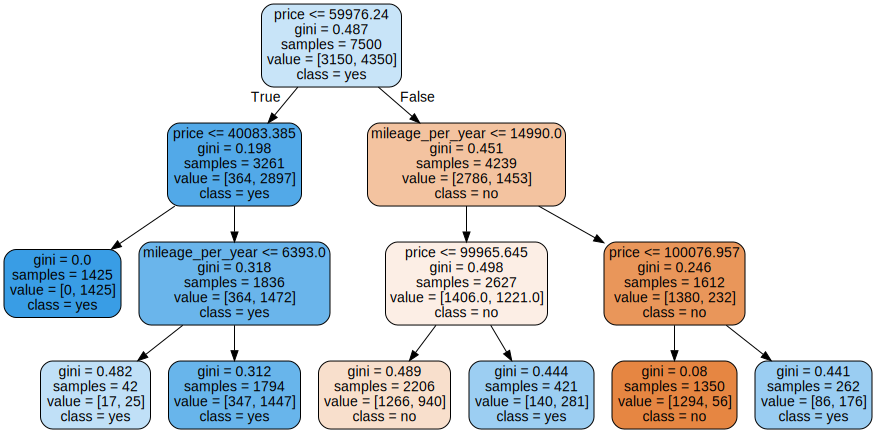

In [27]:
from sklearn.tree import export_graphviz
import graphviz

struture = export_graphviz(modelo, filled=True, rounded=True,
                           feature_names=x.columns,
                           class_names=['no', 'yes'])
graph = graphviz.Source(struture)
graph